In [26]:
!pip install neurokit2
!pip install wfdb
!pip install tensorflow

In [4]:
import numpy as np
import wfdb
def load_data(patient_num, folder):
 loaded = wfdb.rdrecord(patient_num, pn_dir = "ecg-arrhythmia/" + folder, channels = [1])
 loaded = loaded.p_signal
 return loaded

In [15]:
def normalize_data(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    normalized = (data - mean) / std_dev
    return normalized

In [6]:
import scipy.signal
from scipy import signal
import neurokit2 as nk

def preprocess_data(data):
  sample_rate = 500
  undersample_rate = 300
  resample_factor = sample_rate / undersample_rate

  undersample_amt = int(len(data) / resample_factor)
  undersampled = signal.resample(data, undersample_amt)

  #b, a = scipy.signal.butter(10, [5, 149], 'bandpass',fs=300)
  #filteredBandPass = scipy.signal.lfilter(b, a, undersampled)
  
  cleaned = nk.ecg_clean(undersampled, sampling_rate = 300)
  return cleaned

In [11]:
import neurokit2 as nk
def segment_ecg(data):
    signals, info = nk.ecg_process(data.flatten(), sampling_rate = 300)
    peaks = nk.ecg_peaks(signals, sampling_rate = 300)
    rpeaks_indices = peaks[1]
    rpeaks_indices = rpeaks_indices["ECG_R_Peaks"]
    first_rpeak = rpeaks_indices[0]
    data = data[first_rpeak - 100 : first_rpeak ]
    print(rpeaks_indices)
        

Shape of processed_data: (3600, 3000)
Shape of labels: (3600,)


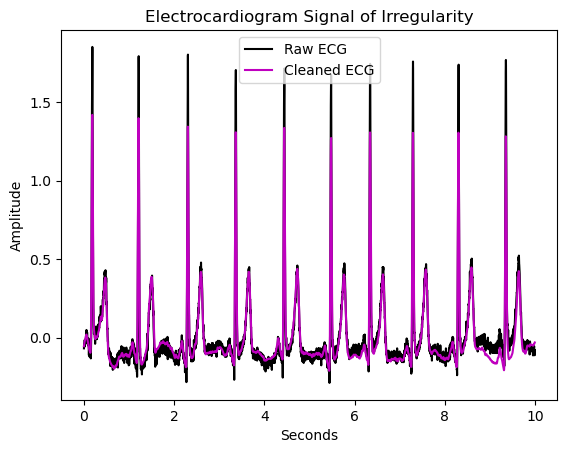

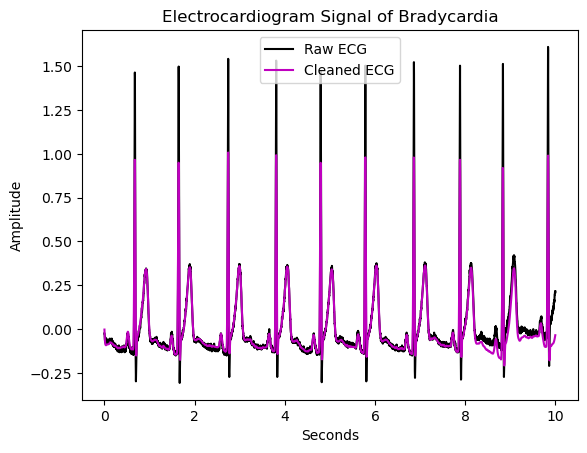

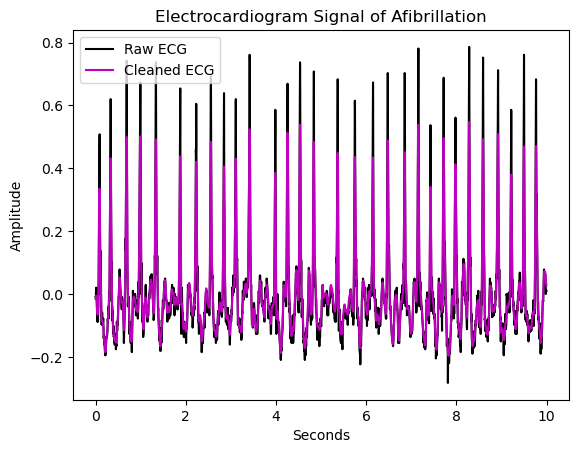

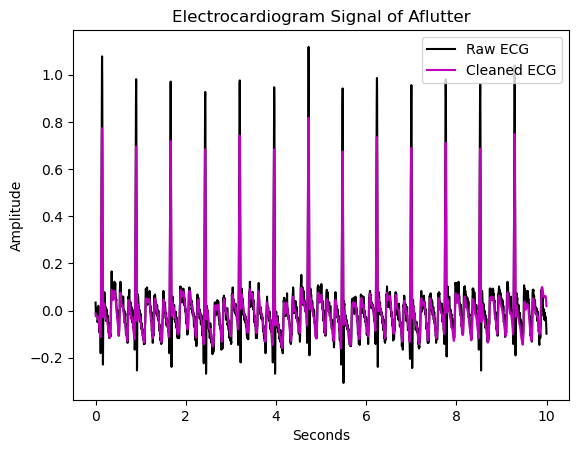

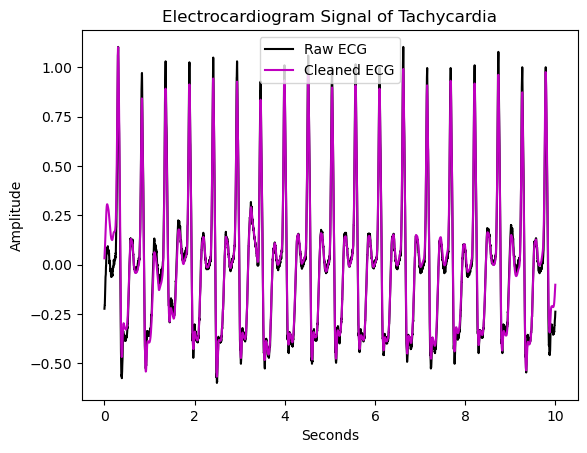

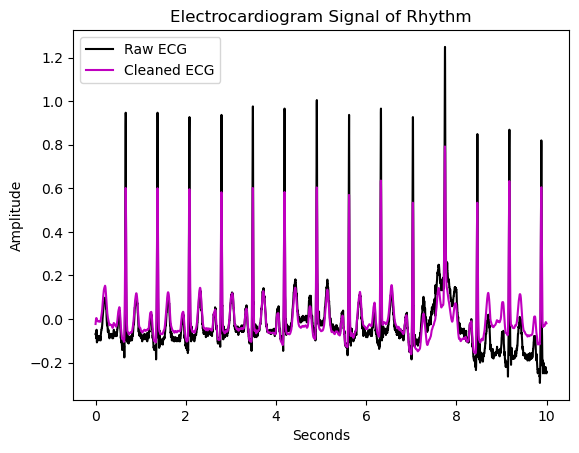

<Figure size 640x480 with 0 Axes>

In [16]:
import csv
import matplotlib.pyplot as plt
import numpy as np
unique_column3 = set()
all_data = []
labels = []

# Path to your CSV file
csv_file = 'selected.csv'

# Open the CSV file
with open(csv_file, 'r', newline='') as file:
    # Create a CSV reader object
    reader = csv.reader(file)
    
    # Iterate over each row in the CSV
    for i, row in enumerate(reader):
        # Each row is a list of columns
        column1 = row[0]  # First column
        column2 = row[1]  # Second column
        column3 = row[2]  # Third column
        data = load_data(column2, column1[:-1])
        #data = normalize_data(data)
        time = np.arange(len(data)) / 500
        if column3 not in unique_column3:
            unique_column3.add(column3)
            plt.plot(time[0:5000], data[0:5000], color = "black")
            preprocessed = preprocess_data(data)
            time = np.arange(len(data)) / 300
            plt.plot(time[0:3000], preprocessed[0:3000], color = "m")
            plt.title("Electrocardiogram Signal of " + column3.capitalize())
            plt.xlabel("Seconds")
            plt.ylabel("Amplitude")
            plt.legend(["Raw ECG", "Cleaned ECG"])
            plt.figure()
        preprocessed = preprocess_data(data)
        normalized = normalize_data(preprocessed)
        #segmented = segment_ecg(normalized)
        all_data.append(normalized)
        labels.append(column3)
        
    all_data = np.array(all_data)
    labels = np.array(labels)
    
    # Save NumPy arrays
    np.save('processed_data.npy', all_data)
    np.save('labels.npy', labels)
    
    # Print shapes
    print("Shape of processed_data:", all_data.shape)
    print("Shape of labels:", labels.shape)
    

c:\Users\rishi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\rishi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Number of NaNs in X: 0
Number of NaNs in y: 0


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)               │ (None, 2998, 64)       │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 1499, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1499, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        23,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,558 (119.37 KB)

 Trainable params: 30,558 (119.37 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.1392 - loss: 1.7920 - val_accuracy: 0.1417 - val_loss: 1.7922
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.1409 - loss: 1.7921 - val_accuracy: 0.1639 - val_loss: 1.7920
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.1951 - loss: 1.7917 - val_accuracy: 0.1778 - val_loss: 1.7919
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.1654 - loss: 1.7912 - val_accuracy: 0.1667 - val_loss: 1.7918
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.1636 - loss: 1.7914 - val_accuracy: 0.1722 - val_loss: 1.7916
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.1795 - loss: 1.7913 - val_accuracy: 0.1750 - val_loss: 1.7915
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.1646 - loss: 1.7913 - val_accuracy: 0.1722 - val_loss: 1.7912
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.1957 - loss: 1.7910 - val_accuracy: 0.1778 - val_loss:

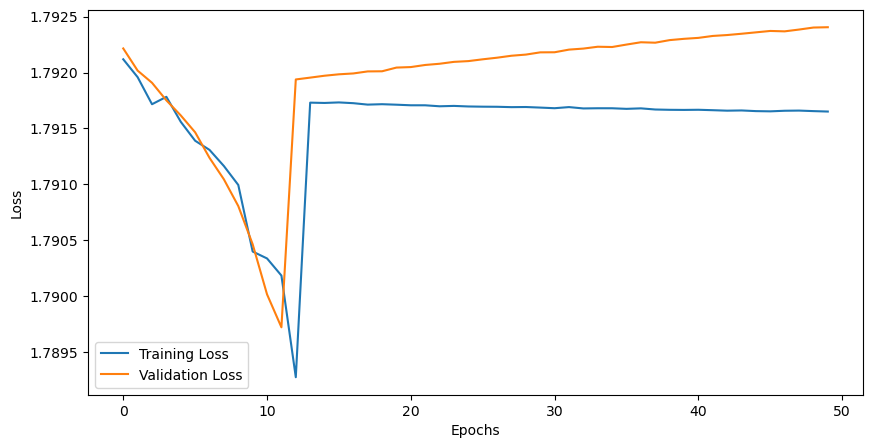

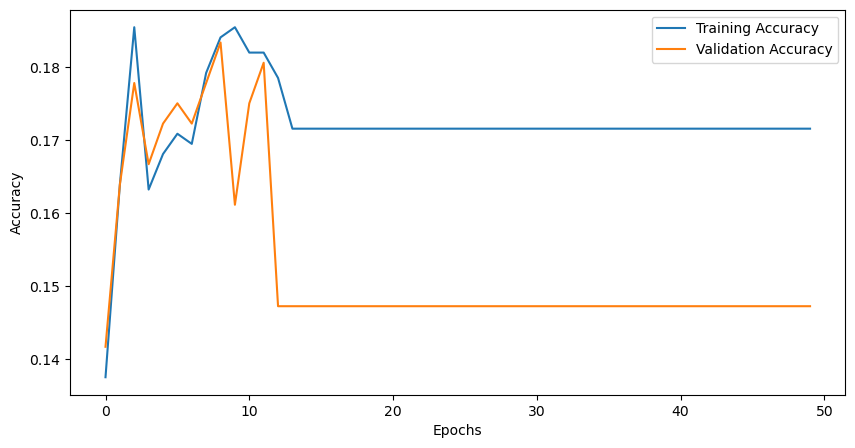

In [31]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load processed data
X = np.load('processed_data.npy', allow_pickle=True)

# Load encoded labels
labels = np.load('labels.npy')

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)

# Perform one-hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)

# Check for NaN values
print(f'Number of NaNs in X: {np.isnan(X).sum()}')
print(f'Number of NaNs in y: {np.isnan(y).sum()}')

# Reshape X to be compatible with Conv1D input in Keras/TensorFlow
input_length = X.shape[1]  # Assuming the length of each sequence in X
X = np.reshape(X, (X.shape[0], input_length, 1))  # Assuming 1 channel (univariate time series)

# Optionally, split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_length, 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),  # Add dropout for regularization
    LSTM(50, activation='relu', dropout=0.2),  # Add dropout for regularization
    Dense(128, activation='relu'),  # Add a dense layer with ReLU activation
    Dropout(0.2),  # Add dropout for regularization
    Dense(y.shape[1], activation='softmax')  # Output layer with softmax activation for multi-class classification
])

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Print a summary of the model
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Number of NaNs in X: 0
Number of NaNs in y: 0


c:\Users\rishi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\rishi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 50)             │       150,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 150,356 (587.33 KB)

 Trainable params: 150,356 (587.33 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.1738 - loss: 1.8013 - val_accuracy: 0.2167 - val_loss: 1.7886
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5293 - loss: 1.5880 - val_accuracy: 0.2306 - val_loss: 1.8126
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6315 - loss: 1.4366 - val_accuracy: 0.2333 - val_loss: 1.8308
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7297 - loss: 1.2503 - val_accuracy: 0.2389 - val_loss: 1.8593
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7877 - loss: 1.0892 - val_accuracy: 0.2417 - val_loss: 1.9098
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8392 - loss: 0.9140 - val_accuracy: 0.2389 - val_loss: 1.9690
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8634 - loss: 0.8026 - val_accuracy: 0.2389 - val_loss: 2.0508
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9195 - loss: 0.6323 - val_accuracy: 0.2444 - val_los

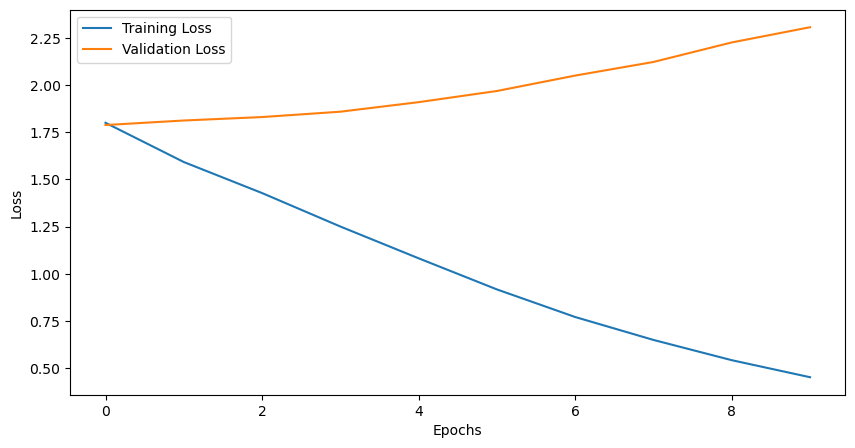

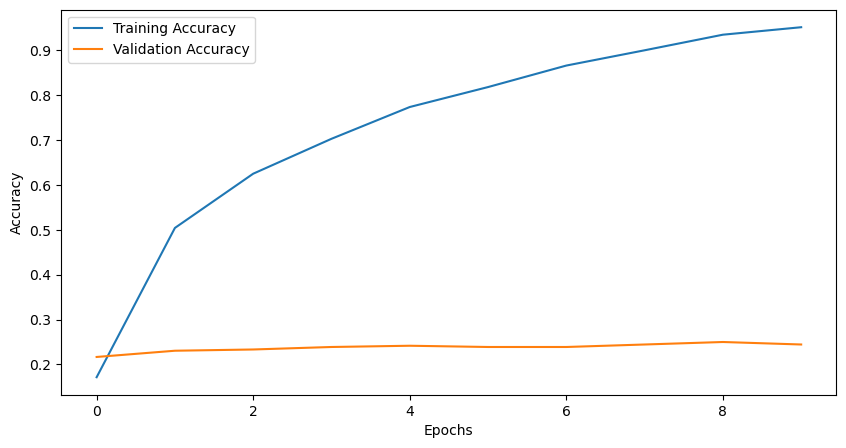

In [32]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

# Load processed data
X = np.load('processed_data.npy', allow_pickle=True)

# Load encoded labels
labels = np.load('labels.npy')

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)

# Perform one-hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)


# Check for NaN values
print(f'Number of NaNs in X: {np.isnan(X).sum()}')
print(f'Number of NaNs in y: {np.isnan(y).sum()}')

# Reshape X to be compatible with Dense input in Keras/TensorFlow
input_length = X.shape[1]  # Assuming the length of each sequence in X
X = np.reshape(X, (X.shape[0], input_length))  # Flatten the data

# Optionally, split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple model architecture
model = Sequential([
    Dense(50, activation='relu', input_shape=(input_length,)),
    Dense(y.shape[1], activation='softmax')  # Output layer with softmax activation for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


c:\Users\rishi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\rishi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Number of NaNs in X: 0
Number of NaNs in y: 0


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_9 (Conv1D)               │ (None, 2998, 32)       │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 1499, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1499, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 1499, 50)       │        16,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,784 (155.41 KB)

 Trainable params: 39,784 (155.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.1587 - loss: 1.7921 - val_accuracy: 0.1694 - val_loss: 1.7923
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.1627 - loss: 1.7914 - val_accuracy: 0.1444 - val_loss: 1.7914
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.1735 - loss: 1.7930 - val_accuracy: 0.1556 - val_loss: 1.7909
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.1470 - loss: 1.7933 - val_accuracy: 0.1500 - val_loss: 1.7912
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.1814 - loss: 1.7912 - val_accuracy: 0.2278 - val_loss: 1.7907
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.1606 - loss: 1.7917 - val_accuracy: 0.1556 - val_loss: 1.7908
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.1709 - loss: 1.7875 - val_accuracy: 0.1583 - val_loss: 1.7910
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.1783 - loss: 1.7876 - val_accuracy: 0.1639 - val_los

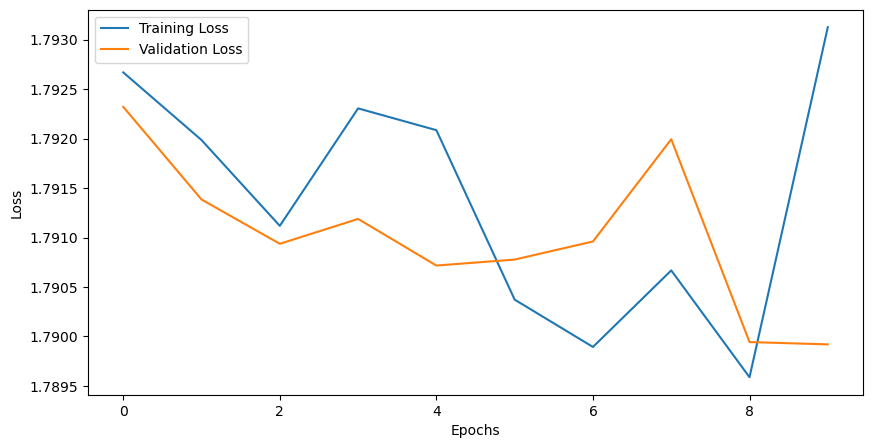

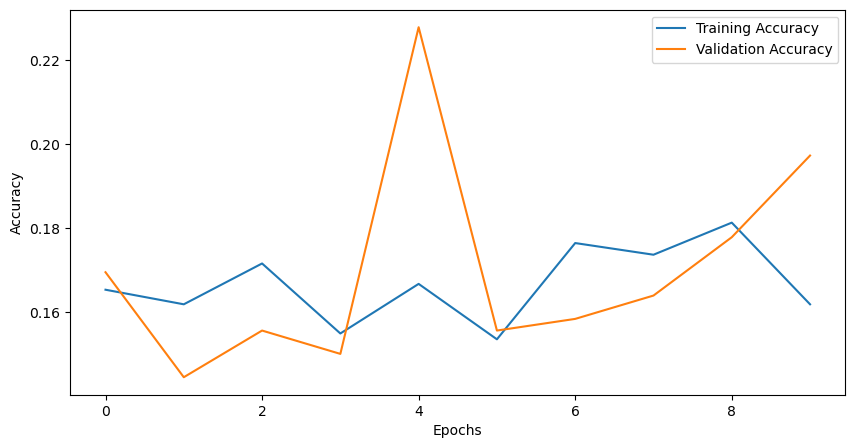

In [33]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

# Load processed data
X = np.load('processed_data.npy', allow_pickle=True)

# Load encoded labels
labels = np.load('labels.npy')

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)

# Perform one-hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)


# Check for NaN values
print(f'Number of NaNs in X: {np.isnan(X).sum()}')
print(f'Number of NaNs in y: {np.isnan(y).sum()}')

# Reshape X to be compatible with Dense input in Keras/TensorFlow
input_length = X.shape[1]  # Assuming the length of each sequence in X
X = np.reshape(X, (X.shape[0], input_length))  # Flatten the data

# Optionally, split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple model architecture
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(input_length, 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Number of NaNs in X: 0
Number of NaNs in y: 0


c:\Users\rishi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\rishi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)              │ (None, 2998, 32)       │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 1499, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 47968)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 50)             │     2,398,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,398,884 (9.15 MB)

 Trainable params: 2,398,884 (9.15 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.1684 - loss: 1.8136 - val_accuracy: 0.1917 - val_loss: 1.7941
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.2682 - loss: 1.7325 - val_accuracy: 0.2083 - val_loss: 1.7748
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.3592 - loss: 1.6187 - val_accuracy: 0.2611 - val_loss: 1.7593
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.5102 - loss: 1.4355 - val_accuracy: 0.2583 - val_loss: 1.8696
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.4881 - loss: 1.3036 - val_accuracy: 0.2778 - val_loss: 1.8078
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.5987 - loss: 1.1056 - val_accuracy: 0.2722 - val_loss: 1.8853
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.6563 - loss: 0.9917 - val_accuracy: 0.2639 - val_loss: 1.9910
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.7141 - loss: 0.8551 - val_accuracy: 0.

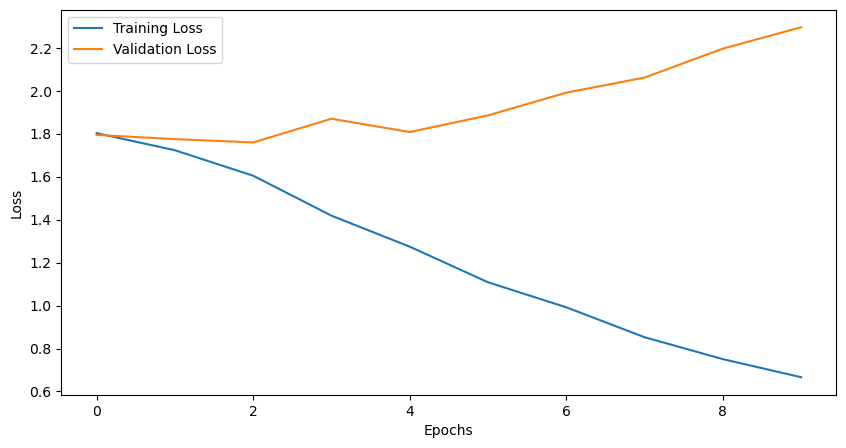

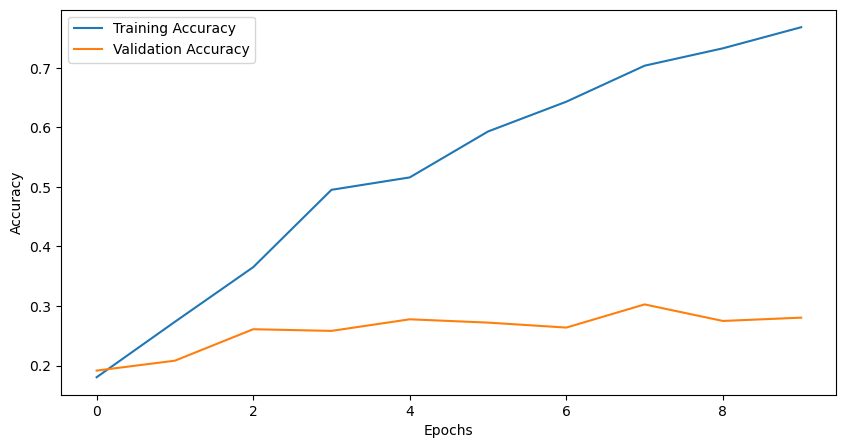

In [34]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

# Load processed data
X = np.load('processed_data.npy', allow_pickle=True)

# Load encoded labels
labels = np.load('labels.npy')

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)

# Perform one-hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)


# Check for NaN values
print(f'Number of NaNs in X: {np.isnan(X).sum()}')
print(f'Number of NaNs in y: {np.isnan(y).sum()}')

# Reshape X to be compatible with Dense input in Keras/TensorFlow
input_length = X.shape[1]  # Assuming the length of each sequence in X
X = np.reshape(X, (X.shape[0], input_length))  # Flatten the data

# Optionally, split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple model architecture
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(input_length, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

c:\Users\rishi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\rishi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Number of NaNs in X: 0
Number of NaNs in y: 0


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_11 (Conv1D)              │ (None, 2996, 64)       │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 1498, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_12 (Conv1D)              │ (None, 1494, 128)      │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 747, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 745, 256)       │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 372, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 95232)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │    24,379,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,521,222 (93.54 MB)

 Trainable params: 24,521,222 (93.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 49s 907ms/step - accuracy: 0.1515 - loss: 1.7910 - val_accuracy: 0.1667 - val_loss: 1.7683
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 34s 742ms/step - accuracy: 0.2389 - loss: 1.7222 - val_accuracy: 0.2278 - val_loss: 1.7653
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 34s 749ms/step - accuracy: 0.4270 - loss: 1.4469 - val_accuracy: 0.2583 - val_loss: 1.8662
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 34s 757ms/step - accuracy: 0.6173 - loss: 1.0724 - val_accuracy: 0.2639 - val_loss: 2.3798
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 33s 738ms/step - accuracy: 0.7627 - loss: 0.6536 - val_accuracy: 0.2944 - val_loss: 3.1242
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 34s 746ms/step - accuracy: 0.8806 - loss: 0.3540 - val_accuracy: 0.3028 - val_loss: 3.2689
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 34s 754ms/step - accuracy: 0.9330 - loss: 0.2290 - val_accuracy: 0.3361 - val_loss: 4.0763
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 34s 766ms/step - accuracy: 0.9599 - loss: 0.1354 - val_accu

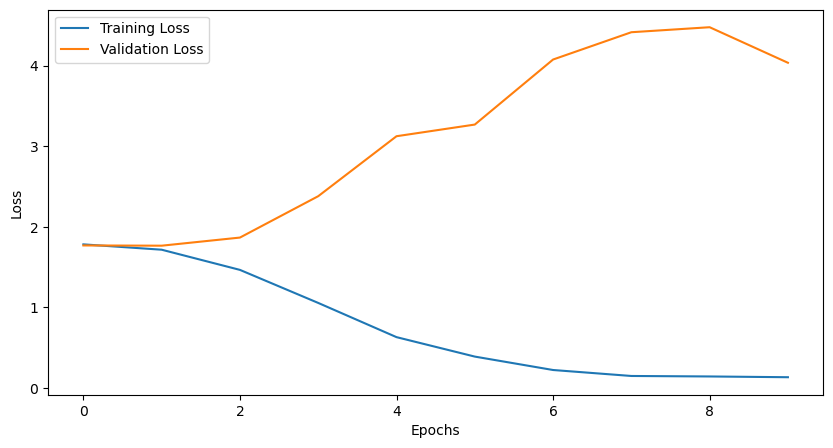

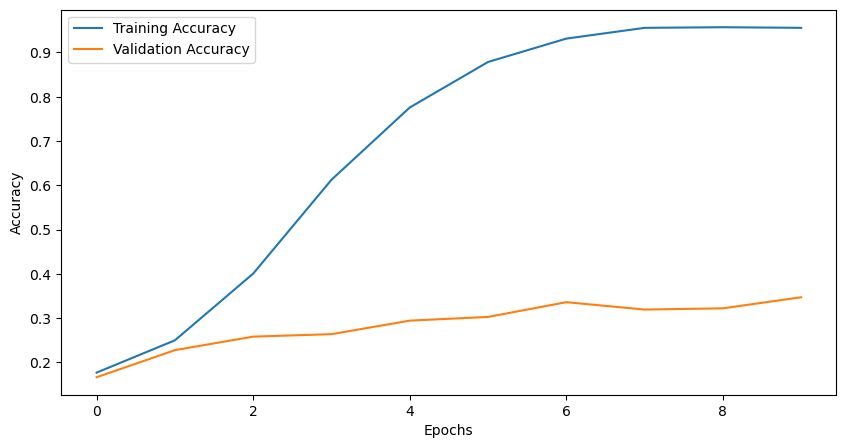

In [35]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

# Load processed data
X = np.load('processed_data.npy', allow_pickle=True)

# Load encoded labels
labels = np.load('labels.npy')

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)

# Perform one-hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)


# Check for NaN values
print(f'Number of NaNs in X: {np.isnan(X).sum()}')
print(f'Number of NaNs in y: {np.isnan(y).sum()}')

# Reshape X to be compatible with Dense input in Keras/TensorFlow
input_length = X.shape[1]  # Assuming the length of each sequence in X
X = np.reshape(X, (X.shape[0], input_length))  # Flatten the data

# Optionally, split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple model architecture
model = Sequential([
    Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(input_length, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=256, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

c:\Users\rishi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\rishi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Number of NaNs in X: 0
Number of NaNs in y: 0


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_14 (Conv1D)              │ (None, 2996, 64)       │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 1498, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_15 (Conv1D)              │ (None, 1494, 128)      │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_15 (MaxPooling1D) │ (None, 747, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_16 (Conv1D)              │ (None, 745, 256)       │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_16 (MaxPooling1D) │ (None, 372, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256)            │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 601,606 (2.29 MB)

 Trainable params: 601,606 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.1510 - loss: 1.7933 - val_accuracy: 0.1472 - val_loss: 1.7911
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.1804 - loss: 1.7890 - val_accuracy: 0.1472 - val_loss: 1.7986
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.2159 - loss: 1.7648 - val_accuracy: 0.2028 - val_loss: 1.7629
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.2220 - loss: 1.7727 - val_accuracy: 0.2417 - val_loss: 1.7339
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.2516 - loss: 1.7254 - val_accuracy: 0.2889 - val_loss: 1.6708
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.2950 - loss: 1.6717 - val_accuracy: 0.2056 - val_loss: 1.7444
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.2312 - loss: 1.7162 - val_accuracy: 0.3500 - val_loss: 1.5597
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.3383 - loss: 1.5845 - val_accuracy: 0.2917 - val_loss:

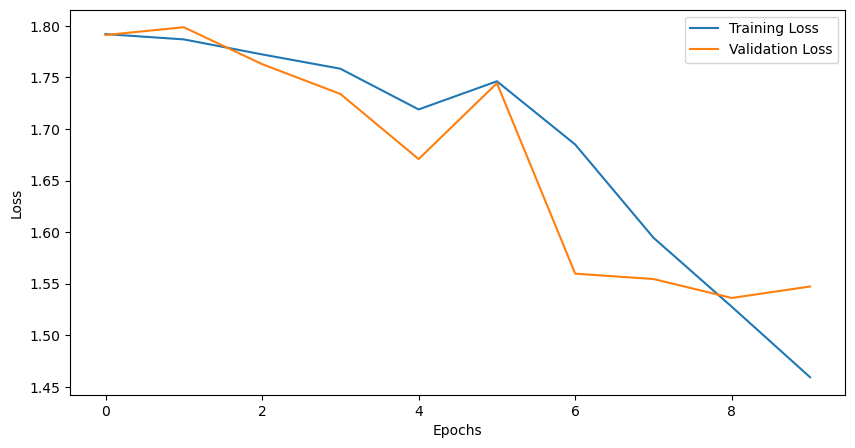

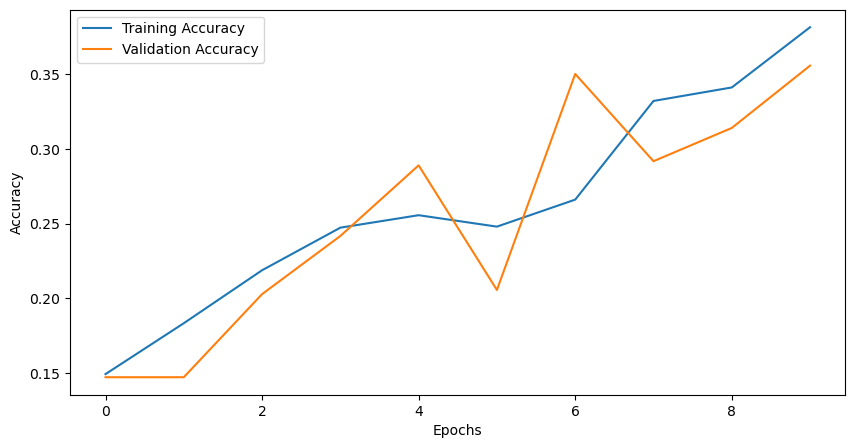

In [36]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout, Bidirectional, LSTM
import matplotlib.pyplot as plt

# Load processed data
X = np.load('processed_data.npy', allow_pickle=True)

# Load encoded labels
labels = np.load('labels.npy')

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)

# Perform one-hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)

# Check for NaN values
print(f'Number of NaNs in X: {np.isnan(X).sum()}')
print(f'Number of NaNs in y: {np.isnan(y).sum()}')

# Reshape X to be compatible with Conv1D input in Keras/TensorFlow
input_length = X.shape[1]  # Assuming the length of each sequence in X
X = np.reshape(X, (X.shape[0], input_length, 1))  # Reshape the data for Conv1D

# Optionally, split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture with Conv1D and Bidirectional LSTM
model = Sequential([
    Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(input_length, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=256, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    # Adding Bidirectional LSTM layer
    Bidirectional(LSTM(128, return_sequences=False)),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
